In [2]:
import pandas as pd
iris = pd.read_csv('Iris.csv')
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
x= iris.iloc[:, :4].values  
y= iris.iloc[:, 5].values


array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)  

In [9]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [12]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
results=classifier.predict(x_test)
results


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [24]:
classifier.predict([[ 85. ,   5.2,   3.2 ,   4.2]])

array(['Iris-virginica'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test,results)
accuracy

1.0

In [17]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, classifier.predict(x_test))  
cm

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

Text(0.5, 1.0, 'scatter')

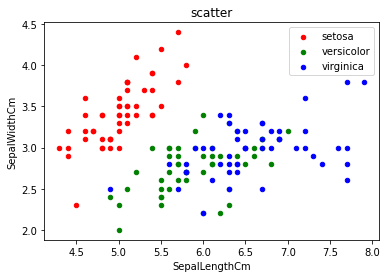

In [20]:
ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

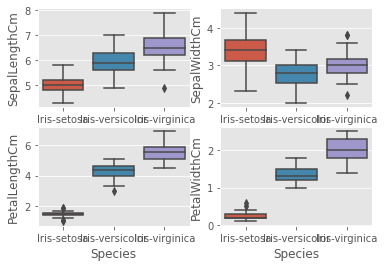

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)
plt.subplot(2,2,2)
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)
plt.subplot(2,2,3)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.subplot(2,2,4)
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)